# Clustering

![Link](https://i.imgur.com/qg73zpI.png)


### Clustering
Clustering, in one sentence, is the extraction of natural groupings of similar data objects.

There are a couple of general ideas that occur quite frequently with respect to clustering:
* The clusters should be naturally occurring in data.
* The clustering should discover hidden patterns in the data.
* Data points within the cluster should be similar.
* Data points in two different clusters should not be similar.
* Common algorithms used for clustering include K-Means, DBSCAN, and Gaussian Mixture Models.



#### Hierarchical clustering is the hierarchical decomposition of the data based on group similarities

This clustering technique is divided into two types:
* Agglomerative
* Divisive

We are going to look into agglomertive clustering in this kernel.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

import numpy as np
import pandas as pd
import os
import matplotlib.image as mpimg

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
from sklearn.decomposition import PCA
import os
import cv2
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from time import time

from scipy import ndimage

from sklearn import manifold, datasets
import glob

from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

# Any results you write to the current directory are saved as output.

['train', 'test', 'train.csv', 'sample_submission.csv']


In [2]:
train_dir = "../input/train/train/"
test_dir = "../input/test/test/"

In [3]:
train_path=train_dir
test_path=test_dir
train_set = pd.read_csv('../input/train.csv').sort_values('id')
train_set.sort_values('id')
train_labels = train_set['has_cactus']
train_labels.head()

0    1
1    1
2    1
3    1
4    1
Name: has_cactus, dtype: int64

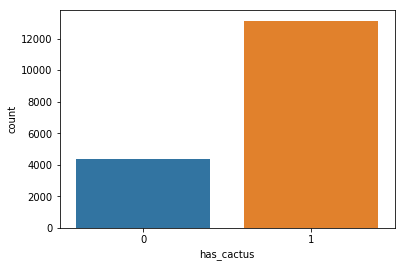

In [4]:
sns.countplot(train_labels)

In [5]:
files = sorted(glob.glob(train_path + '*.jpg'))

train = [cv2.imread(image) for image in files]

train = np.array(train, dtype='int32')

train_images_set = np.reshape(train,[train.shape[0],train.shape[1]*train.shape[2]*train.shape[3]])

## Agglomerative Clustering : 

In this technique, initially each data point is considered as an individual cluster. At each iteration, the similar clusters merge with other clusters until one cluster or K clusters are formed.
The basic algorithm of Agglomerative is straight forward.

1. Compute the proximity matrix
2. Let each data point be a cluster
3. Repeat: Merge the two closest clusters and update the proximity matrix
4. Until only a single cluster remains
5. Key operation is the computation of the proximity of two clusters

![link](https://i.imgur.com/kllrJtc.png)

In [6]:
def plot_clustering(X_red, labels, title=None):
    
    # calculating the minimum and maximum values, so that we can use it to normalize X_red within min/max range for plotting
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)
    # setting the figure size or plot size
    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        # Plotting the text i.e. numbers
        plt.text(X_red[i, 0], X_red[i, 1], str(labels[i]),
                 color=plt.cm.seismic(labels[i]),
                 fontdict={'weight': 'bold', 'size': 9})
        
    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout()

In [7]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(train_images_set)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principalcomponent1',
                                                                  'principalcomponent2'])

In [8]:
print("Computing embedding")
# Converting the data into 2D embedding
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(principalDf)
print("Done.")

Computing embedding
Done.


linkage : 15.21s


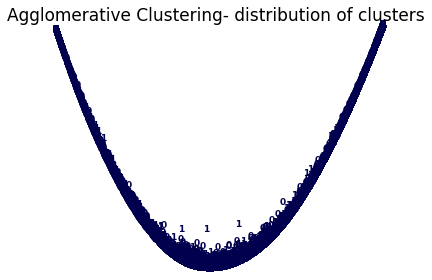

In [9]:
from sklearn.cluster import AgglomerativeClustering

# Calling the agglorimative clustering function from sklearn library.
clustering = AgglomerativeClustering(linkage='ward', n_clusters=10)
# startitng the timier
t0 = time()
# Fitting the data in agglorimative function on order to train it
clustering.fit(X_red)
# printing the time taken
print("%s : %.2fs" % ("linkage", time() - t0))
# Plotting the cluster distribution
plot_clustering(X_red, train_labels, "Agglomerative Clustering- distribution of clusters" )

plt.show()

## Linear Discriminant Analysis

Linear Discriminant Analysis is a generative model for classification. It is a generalization of Fisher’s linear discriminant. LDA works on continuous variables. If the classification task includes categorical variables, the equivalent technique is called the discriminant correspondance analysis.

The goal of Linear Discriminant Analysis is to project the features in higher dimension space onto a lower dimensional space to both reduce the dimension of the problem and achieve classification.

It would take a lot of time to do LDA on this data because it has 3072 columns. So I have applied PCA on it.
This is just a demonstartion of LDA in reality we do not apply PCA and then do LDA because in PCA we are interested in data points with the largest variations. In LDA, we are interested in maximizing the separability between the 2 known data groups to make better decisions.



In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(principalDf, train_set['has_cactus'], test_size=0.33, random_state=42)
  
clf = QDA(store_covariance = True, tol = 0.000000001)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7464935064935065

In [11]:
LDA_CLF = LDA(solver = 'lsqr', tol=0.000000001)
LDA_CLF.fit(X_train,y_train)
y_lda_pred = LDA_CLF.predict(X_test)
accuracy_score(y_test, y_lda_pred)

0.7471861471861472

In [12]:
labels = pd.read_csv("../input/train.csv")


class ImageData(Dataset):
    def __init__(self, df, data_dir, transform):
        super().__init__()
        self.df = df
        self.data_dir = data_dir
        self.transform = transform

    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, index):       
        img_name = self.df.id[index]
        label = self.df.has_cactus[index]
        
        img_path = os.path.join(self.data_dir, img_name)
        image = mpimg.imread(img_path)
        image = self.transform(image)
        return image, label
labels.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [13]:
epochs = 25
batch_size = 20
device = torch.device('cpu')

data_transf = transforms.Compose([transforms.ToPILImage(), transforms.ToTensor()])
train_data = ImageData(df = labels, data_dir = train_dir, transform = data_transf)
train_loader = DataLoader(dataset = train_data, batch_size = batch_size)

#train_num = train_loader.numpy()

num_classes = 2

In [14]:
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 10, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(10),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(p=0.2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(10, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),nn.Dropout2d(p=0.5))
        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(1024, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.shape[0],-1)
        out = self.fc(out)
        return out

In [15]:
net = ConvNet().to(device)
optimizer = optim.Adam(net.parameters(), lr=0.001)
loss_func = nn.CrossEntropyLoss()

In [16]:
train_loader

In [17]:
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        # Forward
        outputs = net(images)
        loss = loss_func(outputs, labels)
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 500 == 0:
            print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, loss.item()))

Epoch [1/25], Loss: 0.1600
Epoch [2/25], Loss: 0.0563
Epoch [3/25], Loss: 0.1608
Epoch [4/25], Loss: 0.0267
Epoch [5/25], Loss: 0.1771
Epoch [6/25], Loss: 0.0286
Epoch [7/25], Loss: 0.0523
Epoch [8/25], Loss: 0.0261
Epoch [9/25], Loss: 0.0125
Epoch [10/25], Loss: 0.0182
Epoch [11/25], Loss: 0.0112
Epoch [12/25], Loss: 0.0165
Epoch [13/25], Loss: 0.0154
Epoch [14/25], Loss: 0.0052
Epoch [15/25], Loss: 0.0824
Epoch [16/25], Loss: 0.0266
Epoch [17/25], Loss: 0.0140
Epoch [18/25], Loss: 0.0212
Epoch [19/25], Loss: 0.0241
Epoch [20/25], Loss: 0.0006
Epoch [21/25], Loss: 0.0021
Epoch [22/25], Loss: 0.0019
Epoch [23/25], Loss: 0.0770
Epoch [24/25], Loss: 0.0014
Epoch [25/25], Loss: 0.0004


In [18]:
submit = pd.read_csv('../input/sample_submission.csv')
test_data = ImageData(df = submit, data_dir = test_dir, transform = data_transf)
test_loader = DataLoader(dataset = test_data, shuffle=False)

predict = []
for batch, (data, target) in enumerate(test_loader):
    data, target = data.to(device), target.to(device)
    output = net(data)
    
    num, pred = torch.max(output.data, 1)
    predict.append(int(pred))

submit['has_cactus'] = predict
submit.to_csv('submission.csv', index=False)